In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sessions = np.arange(25, 77)
data=[]

for session in sessions:
    directory = "./TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename))
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

In [19]:
"""
The selection of the words to be found in the speeches, could have been execute using
the database wordnet from nltk, but for the creation of synonyms related to climate 
change and pollution, the database does not seem to provide a considerable enrichment. 
So, in the end we chose the words. 
"""

""""
from nltk.corpus import wordnet

synonyms = []

for syn in wordnet.synsets(""):
    for l in syn.lemmas():
        synonyms.append(l.name())

print(set(synonyms))
"""

'"\nfrom nltk.corpus import wordnet\n\nsynonyms = []\n\nfor syn in wordnet.synsets(""):\n    for l in syn.lemmas():\n        synonyms.append(l.name())\n\nprint(set(synonyms))\n'

In [20]:
#lower case all words in speech column
df_speech.loc[:,"Speech"] = df_speech.loc[:,"Speech"].str.lower()

#create a column with the climate count
df_speech["Climate"] = 0

words = ["climate", "global warming", "environmental disaster", 
         "sea level", "pollution", "environment", 
         "desertification", "biodiversity", 
         "rising temperature", "kyoto protocol", "paris agreement"]

for x in words: 
    df_speech["Climate"] += df_speech.loc[:, "Speech"].str.count(x)

In [21]:
df_speech

,Session,Year,ISO-alpha3 Code,Speech,Climate
0,25,1970,AUT,155.\t may i begin by expressing to ambassado...,2
1,25,1970,MEX,"33.\t mr. president, i take great pleasure in...",0
2,25,1970,COG,122.\t i cannot begin my intervention without...,0
3,25,1970,DZA,1. the delegation of algeria is very pleased ...,0
4,25,1970,LKA,"176.\t mr. president, the delegation of ceylon...",5
...,...,...,...,...,...
8478,75,2020,MCO,"mr. president of the general assembly,\nmr. se...",12
8479,75,2020,AND,"mr. president,\nmr. secretary general,\nyour e...",18
8480,75,2020,BHR,"in the name of allah, the most gracious, the m...",0
8481,76,2021,CHN,"\n\nmr. president,\n\nthe year 2021 is a truly...",4


In [22]:
#let's create a multi-index data frame
speech = df_speech.set_index(["ISO-alpha3 Code", "Year"])
speech.sort_index(inplace=True)
speech

Session  \
ISO-alpha3 Code Year            
AFG             1971       26   
                1972       27   
                1973       28   
                1974       29   
                1975       30   
...                       ...   
ZWE             2016       71   
                2017       72   
                2018       73   
                2019       74   
                2020       75   

                                                                 Speech  \
ISO-alpha3 Code Year                                                      
AFG             1971  82.\tmr. president, at the outset, i wish to c...   
                1972  mr. president, on behalf of the afghan delegat...   
                1973  ﻿1.\tit is a great pleasure for me to congratu...   
                1974  mr. president, permit me to convey to you the ...   
                1975  114.\t mr. president, it is a pleasure for the...   
...                                                                 ...   
ZWE             2016  let me begin my congratulating you, sir, on yo...   
                2017  i wish to congratulate mr. miroslav lajčák on ...   
                2018  it is my honour and pleasure to deliver my mai...   
                2019  allow me to congratulate mr. tijjani muhammad-...   
                2020  your excellency, ambassador volkan bozkir, pre...   

                      Climate  
ISO-alpha3 Code Year           
AFG             1971        0  
                1972        0  
                1973        1  
                1974        3  
                1975        1  
...                       ...  
ZWE             2016        0  
                2017        6  
                2018        5  
                2019        5  
                2020        1  

[8483 rows x 3 columns]

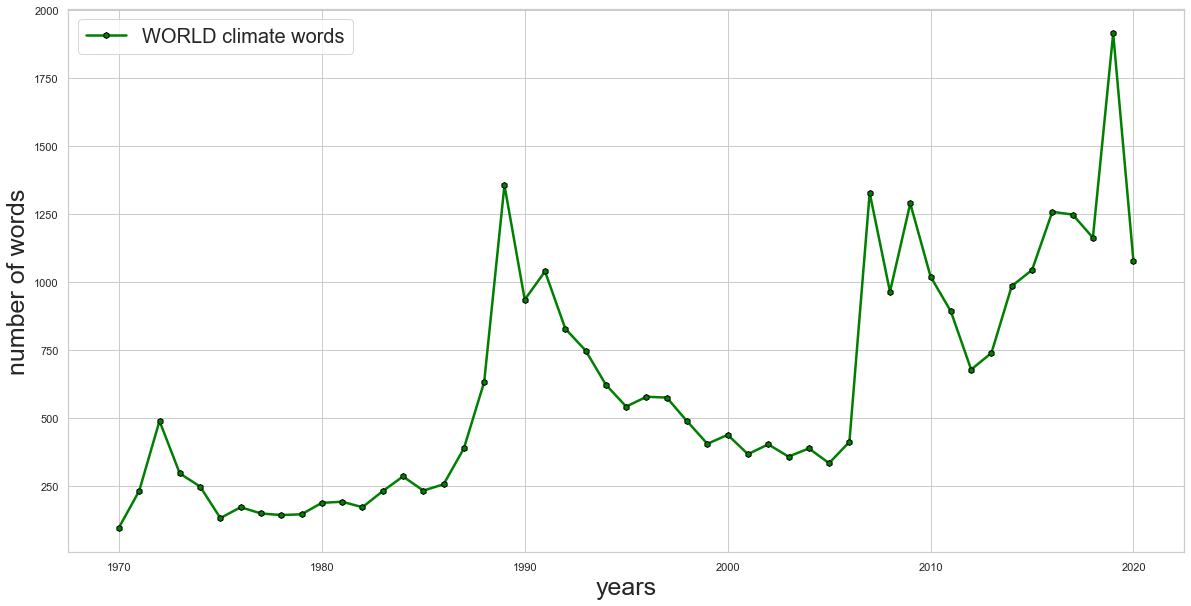

In [23]:
sns.set_theme(style = "whitegrid")

fig, ax = plt.subplots(figsize = (20, 10))

ax.plot((df_speech.iloc[:-2,:].groupby("Year").sum()["Climate"]), linewidth = 2.5, color = "green", 
        marker = "h", markeredgecolor = "black")

plt.xlabel("years", fontsize = 25)
plt.ylabel("number of words", fontsize = 25)

plt.legend(labels = ["WORLD climate words"], fontsize = 20)
plt.show()

In [24]:
#import world map with geopandas
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [25]:
idx = pd.IndexSlice
geopandas_df = pd.merge(world, speech.loc[idx[:,2019],"Climate"],
                        left_on="iso_a3",
                        right_on="ISO-alpha3 Code",
                        how="left")
geopandas_df

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Climate
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",32.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",11.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",10.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",0.0
...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",0.0
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",4.0
174,1794248.0,Europe,Kosovo,KOS,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",10.0


In [26]:
#fill NaNs with zeros
geopandas_df["Climate"] = geopandas_df["Climate"].fillna(0)

In [27]:
#check that no more Nans
geopandas_df[geopandas_df["iso_a3"] == "ESH"]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Climate
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0


<AxesSubplot:>

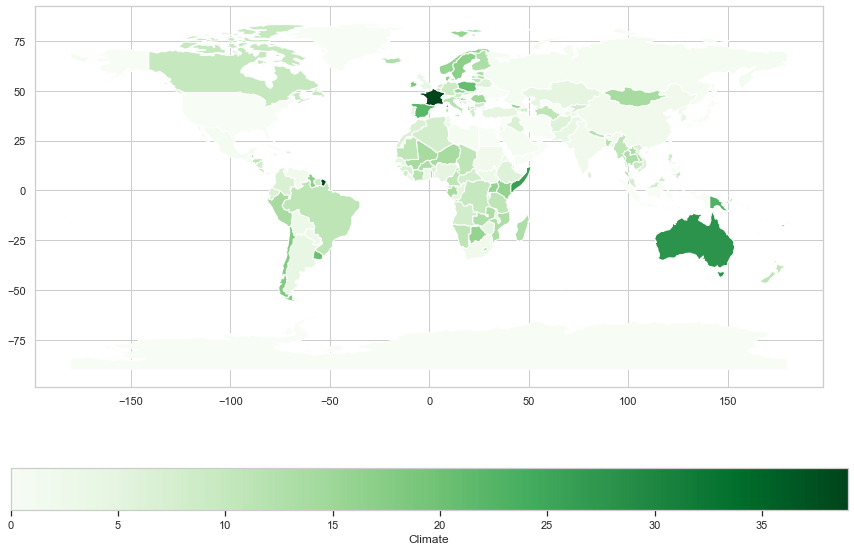

In [28]:
geopandas_df.plot("Climate", figsize=(15,10), cmap='Greens',
                 legend=True,
                 legend_kwds={"label":"Climate", "orientation":"horizontal"})

In [29]:
geopandas_df[geopandas_df["iso_a3"] == "FRA"]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Climate
43,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",39.0


In [30]:
geopandas_df[geopandas_df["iso_a3"] == "ESP"]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Climate
132,47076781.0,Europe,Spain,ESP,1393490,"POLYGON ((-7.45373 37.09779, -7.53711 37.42890...",22.0


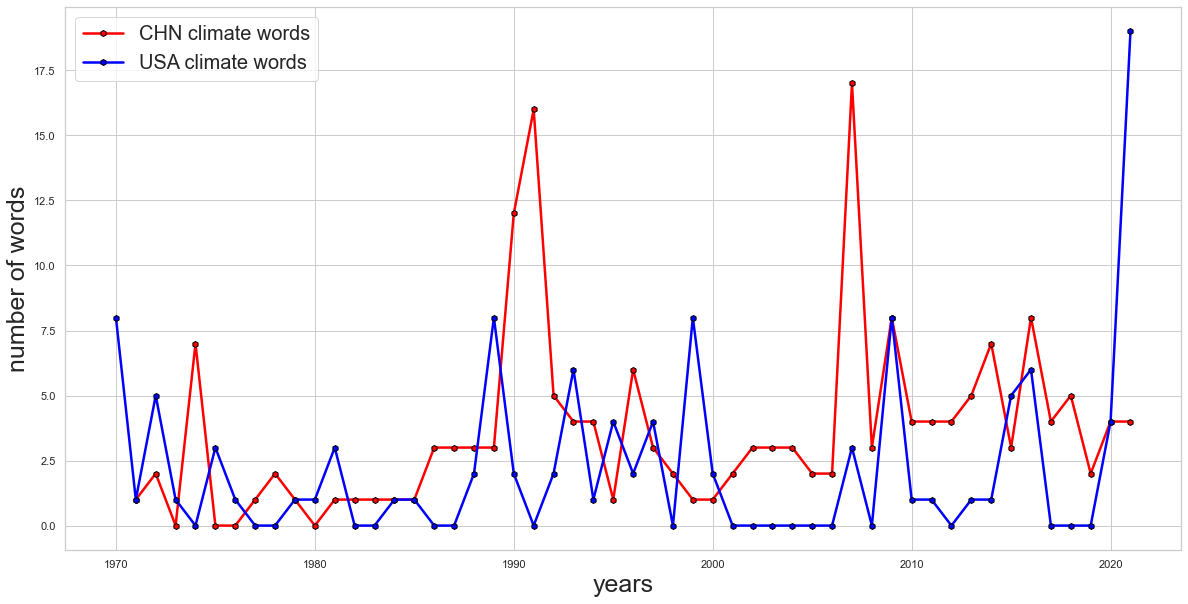

In [37]:
##confront Climate counts for China and USA throughout the years

sns.set_theme(style = "whitegrid")

fig, ax = plt.subplots(figsize = (20, 10))

ax.plot(speech.loc[idx["CHN"], "Climate"], linewidth = 2.5, color = "red", 
        marker = "h", markeredgecolor = "black")
ax.plot(speech.loc[idx["USA"], "Climate"], linewidth = 2.5, color = "blue", 
        marker = "h", markeredgecolor = "black")

plt.xlabel("years", fontsize = 25)
plt.ylabel("number of words", fontsize = 25)

plt.legend(labels = ["CHN climate words", "USA climate words"], fontsize = 20)
plt.show()

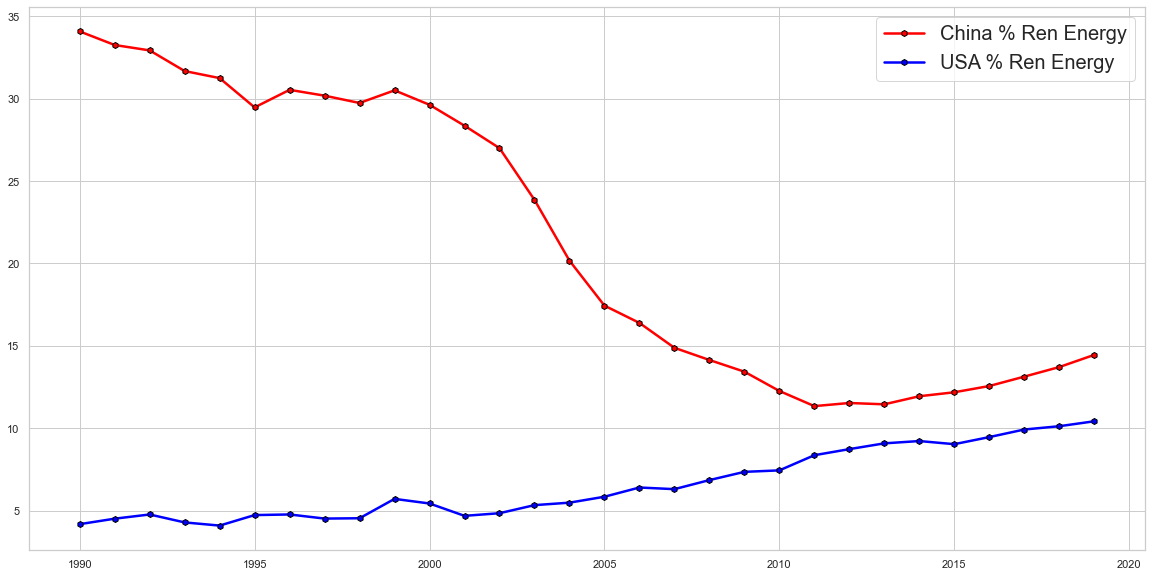

In [32]:
# Loading the file about the amount of renewable energy used. 
renew = pd.read_excel("./Renew.xls", index_col=[1])

# In this part of the code the columns are renamed. 
old_names = list(renew.columns[3:])
new_names = [x for x in np.arange(1960, 2022)]

columns = dict(zip(old_names, new_names))

renew.rename(columns=columns, inplace = True)

"""
Do China and USA use the same amount of renewable energy ? China seems slightly in advantage overall
"""

sns.set_theme(style = "whitegrid")

fig, ax = plt.subplots(figsize = (20, 10))

ax.plot(renew.loc[idx['CHN'], 1990:2019], linewidth = 2.5, color = "red", 
        marker = "h", markeredgecolor = "black")
ax.plot(renew.loc[idx['USA'], 1990:2019], linewidth = 2.5, color = "blue",
        marker = "h", markeredgecolor = "black")

plt.legend(labels = ["China % Ren Energy", "USA % Ren Energy"], fontsize = 20)
plt.show()

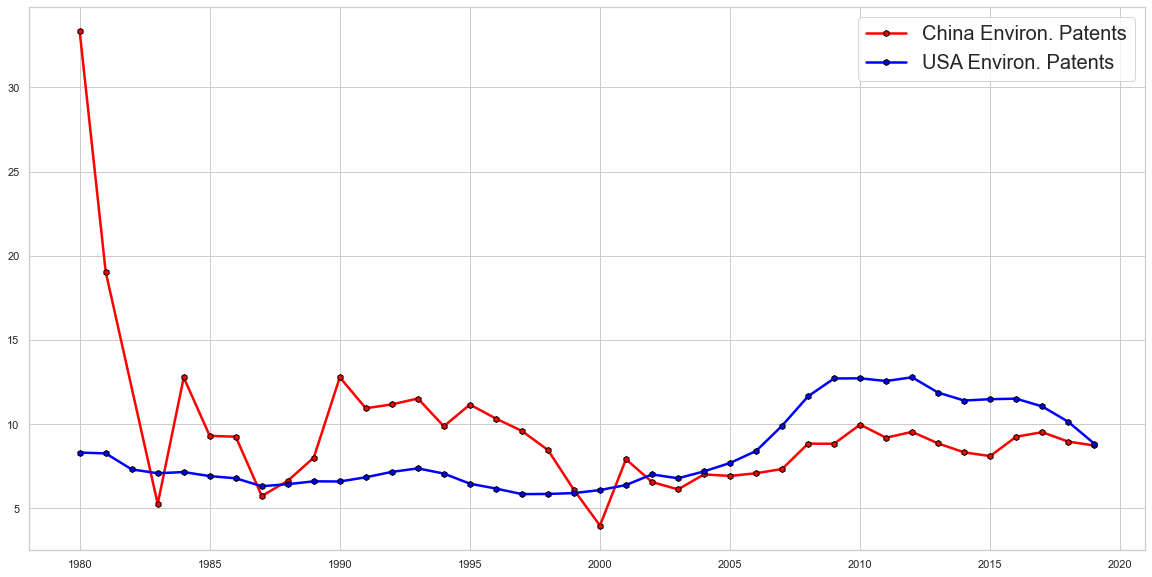

In [33]:
"""
Also in the confrontation related to the percentage of patents related to environmental technologies 
each year produced, we can see that China after several years recovered field. 
"""

patents = pd.read_csv("./DP_LIVE_23092022213711164.csv", index_col=["LOCATION", "TIME"])
patents = patents.drop(["INDICATOR", "SUBJECT", "MEASURE", "FREQUENCY", "Flag Codes"], axis = 1)

sns.set_theme(style = 'whitegrid')

fig, ax = plt.subplots(figsize = (20, 10))

patents.sort_index(inplace=True) #sorting to avoid issues when slicing years

ax.plot(patents.loc[idx["CHN"]], linewidth = 2.5, color = "red", 
        marker = "h", markeredgecolor = "black")
ax.plot(patents.loc[idx["USA",1980:],:].loc[idx["USA"]], linewidth = 2.5, color = "blue", 
        marker = "h", markeredgecolor = "black")

plt.legend(["China Environ. Patents", "USA Environ. Patents"], fontsize = 20)

plt.show()